## Chapter 01. Term Document Matrix (TDM)

In [ ]:
# !pip install pandas

In [4]:
import pandas as pd
import warnings; warnings.filterwarnings('ignore')

df = pd.read_excel('./data/imdb.xlsx') #index_col=0은 파일에서 0번 컬럼이 행번호를 나타냄을 뜻함
df.head()

,Unnamed: 0,review,sentiment
0,0,"A very, very, very slow-moving, aimless movie ...",0
1,1,Not sure who was more lost - the flat characte...,0
2,2,Attempting artiness with black & white and cle...,0
3,3,Very little music or anything to speak of.,0
4,4,The best scene in the movie was when Gerardo i...,1


In [5]:
df = pd.read_excel('./data/imdb.xlsx', index_col=0) #index_col=0은 파일에서 0번 컬럼이 행번호를 나타냄을 뜻함
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
df.shape

(748, 2)

### TDM (Term Document Matrix)

In [ ]:
# !pip install scikit-learn

In [11]:
from sklearn.feature_extraction.text import CountVectorizer # 단어문서행렬을 만드는 모듈
# 토큰이 문서별로 몇 번 등장했는지 행렬로 정리, 특별히 토큰화하는 방법을 지정해주지 않으면 빈 칸을 기준으로 토큰 구분
# max_features : 단어문서행렬에 포함시킬 최대의 단어수를 정의, 위는 빈도수 순으로 최대 500단어까지 포함
# TDM이 희소행렬이므로, 용량이 크기 때문에 너무 많은 단어를 포함시킬 경우, 용량이 부족해질 수 있으므로 용량과 분석의 정확성을 고려
# stop_words: 분석에서 제외할 불용어를 설정, 위는 영어로서 관사, 전치사 등을 제외하며(어순이 무시될 시, 의미를 파악하기 힘드므로) 다른 언어는 리스트 등의 형태로 불용어 목록 제공
cv = CountVectorizer(max_features=500, stop_words='english')
cv

CountVectorizer(max_features=500, stop_words='english')

In [12]:
# review 칼럼을 바탕으로 단어문서행렬 생성
tdm = cv.fit_transform(df['review'])
tdm # tdm 자체는 압축되어 있기 때문에 바로 확인할 수 없음

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [13]:
tdm.shape # 74행 500열 
# 374,000 크기의 표지만, 3434개의 숫자만 존재

(748, 500)

In [15]:
# 단어 목록
cv.get_feature_names_out()[:10] # 단어 목록을 확인, tdm이 아닌 cv에 저장

array(['10', '20', '90', 'absolutely', 'acted', 'acting', 'action',
       'actor', 'actors', 'actress'], dtype=object)

In [16]:
# 단어별 총 빈도
tdm.sum(axis=0) # 단어별 총빈도, axis=0 열별 합계, axis=1 행별 합계

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [17]:
tdm.sum(axis=1) #문서별(각 문장별) 단어 수를 계산, 각 행이 문서이므로 행별 합계를 낼 경우, 문서별 총 단어수를 구할 수 있다

matrix([[  5],
        [  5],
        [ 12],
        [  3],
        [  6],
        [  7],
        [  2],
        [  7],
        [  2],
        [  2],
        [  1],
        [  4],
        [  3],
        [  1],
        [  5],
        [  5],
        [  6],
        [ 10],
        [  3],
        [229],
        [  5],
        [  2],
        [  5],
        [  3],
        [  1],
        [  2],
        [  4],
        [  2],
        [  7],
        [  3],
        [  1],
        [  0],
        [  1],
        [  3],
        [  4],
        [  6],
        [  3],
        [  6],
        [ 11],
        [  3],
        [  4],
        [  3],
        [  2],
        [  0],
        [  0],
        [  6],
        [  4],
        [  3],
        [  1],
        [  8],
        [  5],
        [  5],
        [  2],
        [  2],
        [  4],
        [  5],
        [  5],
        [  1],
        [  2],
        [  4],
        [  3],
        [  4],
        [  0],
        [  1],
        [  2],
        [  3],
        [ 

In [18]:
# 각 단어의 총 빈도를 데이터 프레임으로 만듦, .sum의 결과가 행렬 형태이므로 ._flat을 사용하여 칼럼에 들어갈 수 있는 형태로 변환
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': tdm.sum(axis=0).flat
})

In [19]:
word_count.sort_values('빈도', ascending=False).head() # 빈도순으로 오름차순 정렬

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


In [20]:
# 단어 빈도 저장
word_count.to_csv('./data/word_count.csv')

#### Word Cloud

In [21]:
# !pip install wordcloud

     ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
     ---------- ---------------------------- 41.0/156.8 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 156.8/156.8 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   ---------------------------------------- 153.3/153.3 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ------------ --------------------------- 2.5/7.6 MB 52.3 MB/s eta 0:00:01
   -------------------------- ------------- 5.0/7.6 MB 64.6 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 61.0 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 54.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------  2.6/2.6 MB 55.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 41.3 MB/s eta 0:00:00
   -------------

In [22]:
# 단어의 빈도를 시각화하는 방법
word_count = pd.read_csv('./data/word_count.csv', index_col=0)
word_count.head()

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3


In [23]:
from wordcloud import WordCloud
# font_path: 글꼴의 경로
# max_words: 워드 클라우드를 그릴 단어의 개수
# background_color: 배경색 설정
# width: 가로크기(픽셀 단위)
# height: 세로크기(픽셀 단위)
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)
# 배경 흰색, 최대 100단어, 가로 400픽셀, 세로 300픽셀

In [24]:
word_count.set_index('단어') # 단어가 행 이름이 됨, 테이블 형식

,빈도
단어,
10,29
20,3
90,6
absolutely,9
acted,3
...,...
wrong,3
year,5
years,14


In [25]:
word_count.set_index('단어')['빈도'] #'빈도' 컬럼 하나만 호출

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [26]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
#word_count를 사전 형태로 변환 = dict(zip(word_count['단어'], word_count['빈도']))
count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

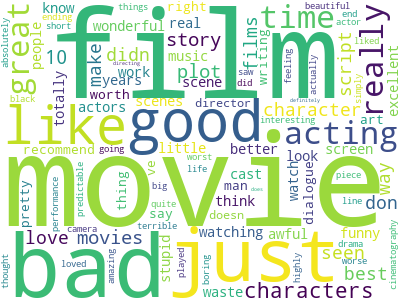

In [27]:
cloud = wc.fit_words(count_dic) #단어 구름을 fit 시킴
cloud.to_image()

In [28]:
cloud.to_file('./data/cloud.png') #단어 구름을 파일로 저장

### TF-IDF

In [29]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
# CountVectorizer와 사용법 거의 동일
# stop_words: 분석에서 제외할 불용어를 설정
# max_features: 단어문서행렬에 포함시킬 최대의 단어 수 설정
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tdm = tfidf.fit_transform(df['review']) # 기준이 될 열을 설정한 뒤, fit_transform 통해 결과를 저장
tdm # 1000개의 문서의 500개의 피처가 결과로 반환

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

단어 빈도순 정렬

In [52]:
# 단어와 tf-idf 를 저장
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    'tf-idf': tdm.sum(axis=0).flat
})
word_count.sort_values('tf-idf', ascending=False).head(5)

,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


#### TF-DIF Transformer

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# CountVectorizer로 만든 단어 문서 행렬을 변환하는 방법으로 TF-IDF 적용 가능

In [31]:
cv = CountVectorizer(max_features=500, stop_words='english')
tdm_2 = cv.fit_transform(df['review'])

In [32]:
trans = TfidfTransformer() # CountVectorizer로 만든 tdm을 TF-IDF가 적용된 새로운 TDM으로 만들어주는 모델
tdm_3 = trans.fit_transform(tdm_2)

#### 두 가지 방법으로 만든 TDM 비교

In [35]:
import numpy as np
np.allclose(tdm.A, tdm_3.A) # 모든 값이 가까운가에 대한 True, False 값으로 미세한 소숫점 아래 단위는 다를 수도 있음

True

In [36]:
# TF-IDF를 제외한 여러가지 가중치를 주는 방법들은 따로 함수가 없으므로 직접 계산해야 함
tdm.A # TDM의 압축을 풀어낸 형태

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.51124215],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
# 정렬
wc2 = pd.DataFrame({
    '단어' : cv.get_feature_names_out(),
    'TF-IDF': tdm_3.sum(axis=0).flat
})
wc2.sort_values('TF-IDF', ascending=False).head()

,단어,TF-IDF
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


In [40]:
tdm_3.sum(axis=0)

matrix([[11.33888731,  0.99497815,  2.25997803,  3.53184781,  1.2637674 ,
         12.56312092,  2.81048701,  3.25602898,  6.25572589,  1.54190864,
          1.40994091,  4.29155366,  0.55970466,  1.83271023,  1.13841228,
          1.58627775,  1.45184937,  0.51466565,  1.3820826 ,  0.9956581 ,
          3.17254846,  1.4611266 ,  1.02078446,  0.6335897 ,  3.79048139,
          1.88546051,  0.47204935,  1.79375919,  1.58636401,  3.06551664,
          2.50043674,  1.63163962,  7.72403206, 25.25857196,  2.60452183,
          4.21396698,  2.04427718,  2.63715752,  4.05052326,  8.51078243,
          6.07058168,  3.34252957,  1.26212214,  3.35140434,  1.57647379,
          1.37939885,  1.10946849,  5.10378767,  1.25499099,  1.48576065,
          3.98851331,  2.83010378,  1.08834381,  1.49508364,  4.40664834,
          1.44094211,  1.41859089,  7.7082567 ,  2.55074348,  2.88452436,
          7.96507027,  9.63880644,  0.26107512,  1.22711973,  2.90370257,
          2.08149893,  1.79433774,  1.

In [39]:
tdm_3.sum(axis=0).flat

### 영어 품사 태깅과 표제어 추출

#### 형태소 분석과 표제어 추출

In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [42]:
import spacy
nlp = spacy.load('en_core_web_sm') # 언어별 모델을 호출 → 영어 모형 호출
# nlp가 함수처럼 작동함

In [43]:
text = "Wikipedia is maintained by volunteers." # 영어 텍스트에 모형 적용
# nlp함수에 텍스트를 넣어주면 모든 분석이 가능하며, 해당 결과를 doc이라는 변수에 저장 가능
doc = nlp(text)

In [44]:
for token in doc:
    print(token.text,    # 토큰이 텍스트에 어떻게 표시되어 있는가?
          token.lemma_,  # 텍스트의 표제어는?
          token.pos_,    # 단어의 품사(간략)
          token.tag_,    # 자세한 품사
          token.dep_,    # 문법적 의존 관계, 주어냐 목적어냐? 등
          token.is_stop) # 불용어 여부
#doc에 들어있는 토큰에 대한 각각의 분석 결과 확인 가능

Wikipedia Wikipedia PROPN NNP nsubjpass False
is be AUX VBZ auxpass True
maintained maintain VERB VBN ROOT False
by by ADP IN agent True
volunteers volunteer NOUN NNS pobj False
. . PUNCT . punct False


In [45]:
spacy.explain('PROPN') #용어가 어떤 뜻인지 설명을 출력, PROPN = 고유 명사

'proper noun'

#### 특정 품사로 단어 문서 행렬 만들기

In [46]:
words = []

for token in doc:
    if token.tag_[0] in 'NV': # 토큰의 첫 번째 글짜가 N이나 V에 포함되는가? (명사와 동사)
        words.append(token.text.lower()) # token.lemma_ 도 가능, 원문 혹은 표제어 # .lower()를 사용하면 토큰을 소문자 변환 가능

In [47]:
words

['wikipedia', 'is', 'maintained', 'volunteers']

In [48]:
# 위의 과정을 함수로 정의
def extract_nv(text):
    doc = nlp(text)
    words = []
    for token in doc:
        if token.tag_[0] in 'NV':
            words.append(token.lemma_.lower())
    return words                                # 명사와 동사의 표제어만 추출하는 함수를 만듦

In [49]:
extract_nv('Apple is a company.')

['apple', 'be', 'company']

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
# 기본적인 CountVector는 빈칸 단위로 끊어 토큰을 지정하지만, tokenizer 지정을 통해 토큰을 추출할 수 있음
cv = CountVectorizer(max_features=500, tokenizer=extract_nv) # CountVectorizer를 초기화

In [52]:
import pandas as pd
df = pd.read_excel('./data/imdb.xlsx', index_col=0)
df.head() # 데이터 호출

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [53]:
# 형태소 분석과 특정 품사 추출이 진행되므로 기존보다 시간이 걸림
tdm = cv.fit_transform(df['review']) # tdm 제작

In [55]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': tdm.sum(axis=0).flat
})
wc.sort_values('빈도', ascending=False).head() # 빈도 순 정렬
# stop_word 제거를 안해줬기 때문에 be 동사가 가장 많이 잡히며, 나머지 단어들 또한 모두 원형으로 추출됨

,단어,빈도
34,be,845
298,movie,211
158,film,189
196,have,131
121,do,90
